<a href="https://colab.research.google.com/github/Tom4c3/masters-thesis-GoogleColab/blob/main/%E3%80%90%E3%83%86%E3%83%B3%E3%83%97%E3%83%AC%E3%80%91NASA_TLX%E3%82%B0%E3%83%A9%E3%83%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

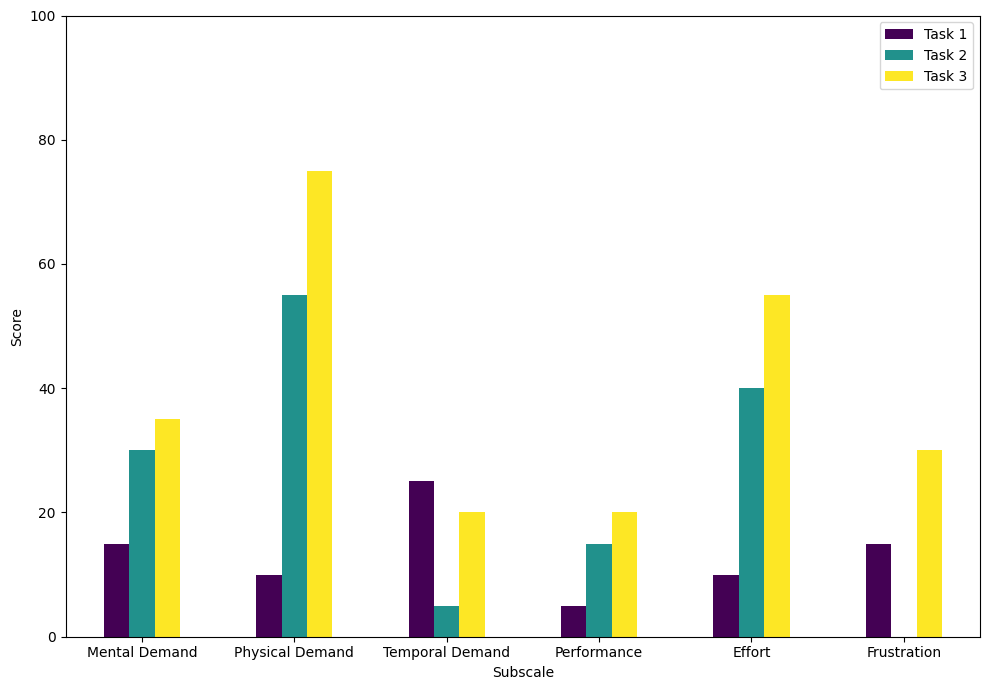

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# データの作成
data = {
    'Subscale': ['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration'],
    'Task 1': [15, 10, 25, 5, 10, 15],
    'Task 2': [30, 55, 5, 15, 40, 0],
    'Task 3': [35, 75, 20, 20, 55, 30]
}

df = pd.DataFrame(data)

# プロット
ax = df.plot(x='Subscale', kind='bar', figsize=(10,7), colormap='viridis')

# Y軸の範囲を0～100に設定
ax.set_ylim(0, 100)


#plt.title('NASA-TLX Subscales Scores for 3 Tasks')
plt.ylabel('Score')
plt.xlabel('Subscale')
plt.xticks(rotation=0)  # サブスケールのラベルを横書きにする
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()


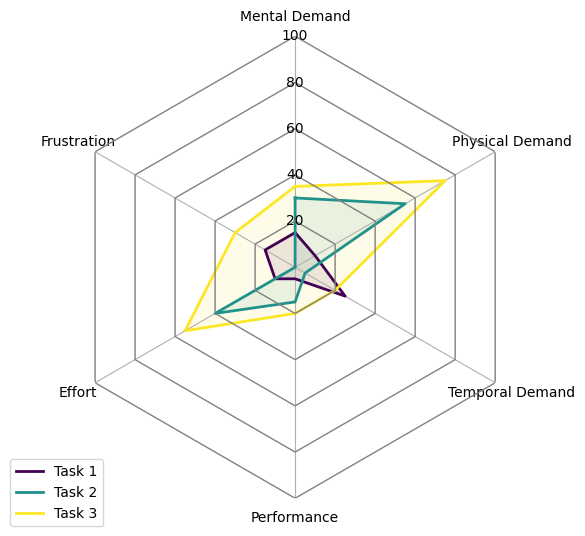

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# データの作成
data = {
    'Subscale': ['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration'],
    'Task 1': [15, 10, 25, 5, 10, 15],
    'Task 2': [30, 55, 5, 15, 40, 0],
    'Task 3': [35, 75, 20, 20, 55, 30]
}

# データフレームの作成
df = pd.DataFrame(data)

# レーダーチャートの軸のラベル
categories = df['Subscale'].tolist()
categories = [categories[0]] + categories[-1:0:-1]  # 'Mental Demand' を最初にする
N = len(categories)

# データポイントをプロットする角度
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # 閉じるために最初の角度を末尾に追加

# プロットの設定
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# カテゴリをx軸に設定
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_theta_offset(np.pi / 2)  # 'Mental Demand' を上に配置
ax.set_theta_direction(1)  # 右回りの方向

# タスクごとにレーダーチャートをプロット (指定されたカラーコードを使用)
colors = ['#440154', '#21918c', '#fde725']  # Task 1, Task 2, Task 3 に対応する色

for i, color in enumerate(colors, start=1):
    values = df.iloc[:, i].tolist()
    values = [values[0]] + values[-1:0:-1]  # 'Mental Demand' の値を最初にする
    values += values[:1]  # 閉じるために最初のデータを末尾に追加
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df.columns[i], color=color)
    ax.fill(angles, values, alpha=0.1, color=color)

# Y軸の範囲を0〜100に設定し、元の目盛りの数字を非表示にします
ax.set_ylim(0, 100)
ax.set_rgrids([20, 40, 60, 80, 100], labels=['' for _ in range(5)])

# 円形の目盛りを非表示にする
ax.set_yticklabels([])
ax.set_yticks([])

# 六角形の目盛りを追加
for r in [20, 40, 60, 80, 100]:
    hex_angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist() + [0]
    hex_radius = [r] * (N + 1)
    ax.plot(hex_angles, hex_radius, linestyle='-', color='grey', linewidth=1)
    # 目盛りの数字を描画
    ax.text(0, r, str(r), ha='center', va='center', fontsize=10, color='black')

# 凡例を追加
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# 円形のデフォルトの枠線を非表示にする
ax.spines['polar'].set_visible(False)

plt.show()
